<a href="https://colab.research.google.com/github/thunder-volt/CVAE/blob/main/CVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Envelpoes/NGAwest.csv',low_memory=False)

In [ ]:
newDf=pd.DataFrame()

In [ ]:
newDf = df[columns_to_select].copy()

In [ ]:
newDf

,Station Sequence Number,EQID,PGA(g),T0.010S,T0.020S,T0.030S,T0.040S,T0.050S,T0.060S,T0.070S,...,T1.200S,T1.500S,T2.000S,T3.000S,T4.000S,Magnitude,Hypocenter-Depth,Joyner-Boore-Distance,Vs30,Mechanism Based on Rake Angle
0,197,1,0.157000,0.162000,0.16400,0.17700,0.225000,0.269000,0.317000,0.365000,...,0.084700,0.059100,0.035900,0.015300,0.007990,6.0,6.000,2.07,593.35,0
1,198,2,0.046400,0.047500,0.04920,0.05550,0.068200,0.077800,0.120000,0.141000,...,0.001360,0.001140,0.000681,0.000237,0.000123,6.0,6.000,2.09,551.82,0
2,133,3,0.041000,0.041000,0.04120,0.04150,0.041700,0.043100,0.042800,0.044100,...,0.028600,0.016200,0.009350,0.002960,0.001720,5.8,10.000,71.28,219.31,0
3,75,4,0.018400,0.018500,0.01880,0.01960,0.022200,0.024300,0.026800,0.030700,...,0.004310,0.002120,0.000959,0.000382,0.000165,5.0,16.000,32.44,213.44,0
4,133,5,0.122000,0.122000,0.12400,0.12500,0.132000,0.127000,0.143000,0.138000,...,0.041400,0.026800,0.013700,0.004020,0.002370,5.5,10.000,52.73,219.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,100433,1265,0.005030,0.005180,0.00518,0.00534,0.005510,0.006220,0.006400,0.006780,...,0.000179,0.000114,0.000064,0.000028,0.000016,3.6,8.465,34.71,723.35,0
21536,100448,1265,0.000493,0.000505,0.00050,0.00053,0.000637,0.000774,0.000806,0.000951,...,0.000054,0.000043,0.000016,0.000006,0.000003,3.6,8.465,50.73,432.00,0
21537,100331,1265,0.002950,0.003060,0.00306,0.00315,0.003620,0.004660,0.005650,0.005420,...,0.000086,0.000052,0.000032,0.000012,0.000007,3.6,8.465,38.29,535.12,0
21538,100054,1265,0.001590,0.001620,0.00161,0.00177,0.002740,0.003970,0.003770,0.005160,...,0.000109,0.000067,0.000032,0.000018,0.000007,3.6,8.465,17.73,655.67,0


In [ ]:
newDf.replace(-999, pd.NA, inplace=True)
newDf = newDf.dropna(axis=0)

In [ ]:
newDf.loc[:, 'log10_Vs30'] = newDf['Vs30'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

<ipython-input-9-8a2f8739f217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.loc[:, 'log10_Vs30'] = newDf['Vs30'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


In [ ]:
newDf.loc[:, 'log10_JBD'] = newDf['Joyner-Boore-Distance'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

<ipython-input-10-f3f183162f71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.loc[:, 'log10_JBD'] = newDf['Joyner-Boore-Distance'].apply(lambda x: np.log10(x) if x > 0 else np.nan)


In [ ]:
# newDf.replace(-999, pd.NA, inplace=True)
# newDf = newDf.dropna(axis=0)

In [ ]:
newDf = newDf[newDf['Magnitude'] >= 4]

In [ ]:
newDf = newDf[newDf['Hypocenter-Depth'] < 25.2]

In [ ]:
newDf = newDf[newDf['Joyner-Boore-Distance'] <= 500]

In [ ]:
newDf = newDf[newDf['Joyner-Boore-Distance'] >= 1]

In [ ]:
newDf = newDf.reset_index(drop=True)

In [ ]:
# Assuming df is your DataFrame
newDf = newDf.apply(pd.to_numeric, errors='coerce')
newDf = newDf.astype(float)

In [ ]:
newDf

,Station Sequence Number,EQID,PGA(g),T0.010S,T0.020S,T0.030S,T0.040S,T0.050S,T0.060S,T0.070S,...,T2.000S,T3.000S,T4.000S,Magnitude,Hypocenter-Depth,Joyner-Boore-Distance,Vs30,Mechanism Based on Rake Angle,log10_Vs30,log10_JBD
0,197.0,1.0,0.157000,0.162000,0.164000,0.177000,0.225000,0.269000,0.317000,0.365000,...,0.035900,0.015300,0.007990,6.0,6.000,2.07,593.35,0.0,2.773311,0.315970
1,198.0,2.0,0.046400,0.047500,0.049200,0.055500,0.068200,0.077800,0.120000,0.141000,...,0.000681,0.000237,0.000123,6.0,6.000,2.09,551.82,0.0,2.741797,0.320146
2,133.0,3.0,0.041000,0.041000,0.041200,0.041500,0.041700,0.043100,0.042800,0.044100,...,0.009350,0.002960,0.001720,5.8,10.000,71.28,219.31,0.0,2.341058,1.852968
3,75.0,4.0,0.018400,0.018500,0.018800,0.019600,0.022200,0.024300,0.026800,0.030700,...,0.000959,0.000382,0.000165,5.0,16.000,32.44,213.44,0.0,2.329276,1.511081
4,133.0,5.0,0.122000,0.122000,0.124000,0.125000,0.132000,0.127000,0.143000,0.138000,...,0.013700,0.004020,0.002370,5.5,10.000,52.73,219.31,0.0,2.341058,1.722058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,100320.0,1024.0,0.000216,0.000219,0.000218,0.000222,0.000227,0.000234,0.000232,0.000242,...,0.000067,0.000028,0.000014,4.4,6.957,114.10,760.00,0.0,2.880814,2.057286
15231,100581.0,1024.0,0.000145,0.000147,0.000145,0.000146,0.000147,0.000150,0.000149,0.000159,...,0.000061,0.000023,0.000021,4.4,6.957,169.06,760.00,0.0,2.880814,2.228041
15232,100413.0,1024.0,0.000697,0.000706,0.000699,0.000705,0.000714,0.000728,0.000796,0.000859,...,0.000256,0.000072,0.000039,4.4,6.957,136.18,664.57,0.0,2.822541,2.134113
15233,100465.0,1024.0,0.000325,0.000329,0.000328,0.000331,0.000339,0.000348,0.000358,0.000396,...,0.000116,0.000036,0.000024,4.4,6.957,144.13,760.00,0.0,2.880814,2.158754


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X = newDf.values[:, 26:]
y = newDf.values[:, :26]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test= train_test_split(X_normalized,y ,test_size=0.2, random_state=42)
y_train = np.log(Y_train[:, 2:26])
y_test = np.log(Y_test[:, 2:26])

In [ ]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import mse
from keras.optimizers import Adam
import tensorflow as tf
# Define encoder model
def create_encoder(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3):
    input_layer = Input(shape=(input_dim,))
    x = Dense(intermediate_dim, activation='relu')(input_layer)
    x = Dense(intermediate_dim_1, activation='relu')(x)
    x = Dense(intermediate_dim_2, activation='relu')(x)
    x = Dense(intermediate_dim_3, activation='relu')(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    return Model(input_layer, [z_mean, z_log_var])

# Define decoder model
def create_decoder(latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3, input_dim):
    latent_inputs = Input(shape=(latent_dim,))
    decoder_h = Dense(intermediate_dim_3, activation='relu')(latent_inputs)
    decoder_h = Dense(intermediate_dim_2, activation='relu')(decoder_h)
    decoder_h = Dense(intermediate_dim_1, activation='relu')(decoder_h)
    decoder_h = Dense(intermediate_dim, activation='relu')(decoder_h)
    decoder_mean = Dense(input_dim, name='decoder_output')(decoder_h)
    decoder_output = decoder_mean
    return Model(latent_inputs, decoder_output)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Define VAE architecture
def create_vae(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3):
    encoder = create_encoder(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3)
    decoder = create_decoder(latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3, input_dim)

    input_layer = Input(shape=(input_dim,))
    z_mean, z_log_var = encoder(input_layer)
    z = Lambda(sampling)([z_mean, z_log_var])
    output_layer = decoder(z)

    vae = Model(input_layer, output_layer)

    reconstruction_loss = mse(K.flatten(input_layer), K.flatten(output_layer))
    kl_loss = (-5e-5)*K.mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)

    return vae, encoder, decoder

# Example usage:
input_dim = y_train.shape[1]  # Dimension of input and output
latent_dim = 3  # Dimension of latent space
intermediate_dim = 16  # Dimension of intermediate layer
intermediate_dim_1 = 12
intermediate_dim_2 = 8
intermediate_dim_3 = 2

vae, encoder, decoder = create_vae(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3)
optimizer = Adam(lr=0.0002)
vae.compile(optimizer=optimizer, metrics=['R2Score', 'mse'])
vae.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 24)]                 0         []                            
                                                                                                  
 model_3 (Functional)        [(None, 3),                  744       ['input_6[0][0]']             
                              (None, 3)]                                                          
                                                                                                  
 lambda_1 (Lambda)           (None, 3)                    0         ['model_3[0][0]',             
                                                                     'model_3[0][1]']             
                                                                                            

In [ ]:
# Assuming y_train is your training data
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Define the checkpoint file path
checkpoint_path = 'checkpoints/best_model.h5'

# Create a ModelCheckpoint callback to save the best model
ckpt_callback = ModelCheckpoint(filepath=checkpoint_path,
                                monitor='val_loss',
                                save_best_only=True,
                                save_weights_only=False,  # Save entire model, not just weights
                                verbose=1)

# Train the model using the custom loss function
history = vae.fit(y_train, y_train, batch_size=16, epochs=50, validation_split=0.25, callbacks=[ckpt_callback], verbose=1)

# Load the best model from the checkpoint file
best_model = load_model(checkpoint_path)

Epoch 1/50
564/572 [============================>.] - ETA: 0s - loss: 8.7140 - r2_score: -0.2768 - mse: 8.7119
Epoch 1: val_loss improved from inf to 2.78713, saving model to checkpoints/best_model.h5
572/572 [==============================] - 4s 4ms/step - loss: 8.6288 - r2_score: -0.2660 - mse: 8.6360 - val_loss: 2.7871 - val_r2_score: 0.5914 - val_mse: 2.7891
Epoch 2/50
 38/572 [>.............................] - ETA: 1s - loss: 2.6001 - r2_score: 0.6129 - mse: 2.5994

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


572/572 [==============================] - ETA: 0s - loss: 1.9911 - r2_score: 0.7093 - mse: 1.9921
Epoch 2: val_loss improved from 2.78713 to 1.40988, saving model to checkpoints/best_model.h5
572/572 [==============================] - 2s 3ms/step - loss: 1.9911 - r2_score: 0.7093 - mse: 1.9921 - val_loss: 1.4099 - val_r2_score: 0.7943 - val_mse: 1.4099
Epoch 3/50
570/572 [============================>.] - ETA: 0s - loss: 0.8837 - r2_score: 0.8723 - mse: 0.8826
Epoch 3: val_loss improved from 1.40988 to 0.59926, saving model to checkpoints/best_model.h5
572/572 [==============================] - 2s 3ms/step - loss: 0.8819 - r2_score: 0.8724 - mse: 0.8815 - val_loss: 0.5993 - val_r2_score: 0.9143 - val_mse: 0.5976
Epoch 4/50
559/572 [============================>.] - ETA: 0s - loss: 0.5456 - r2_score: 0.9221 - mse: 0.5432
Epoch 4: val_loss improved from 0.59926 to 0.54939, saving model to checkpoints/best_model.h5
572/572 [==============================] - 2s 4ms/step - loss: 0.5452 - r

In [ ]:
# Print the encoded data
encoded_data_train, _ = encoder.predict(y_train)
print("Encoded", encoded_data_train)
encoded_data_test, _ = encoder.predict(y_test)

381/381 [==============================] - 1s 1ms/step
Encoded [[ 3.6528683   1.8930622   2.0581884 ]
 [ 2.8898547  -1.075104   -0.7217926 ]
 [ 2.9899023  -0.4976757  -0.18330336]
 ...
 [ 3.2389781   0.68160796  0.91860867]
 [ 3.131755   -0.19339588  0.10474813]
 [ 4.363407    2.6131258   2.7578945 ]]
96/96 [==============================] - 0s 1ms/step


96/96 [==============================] - 0s 1ms/step


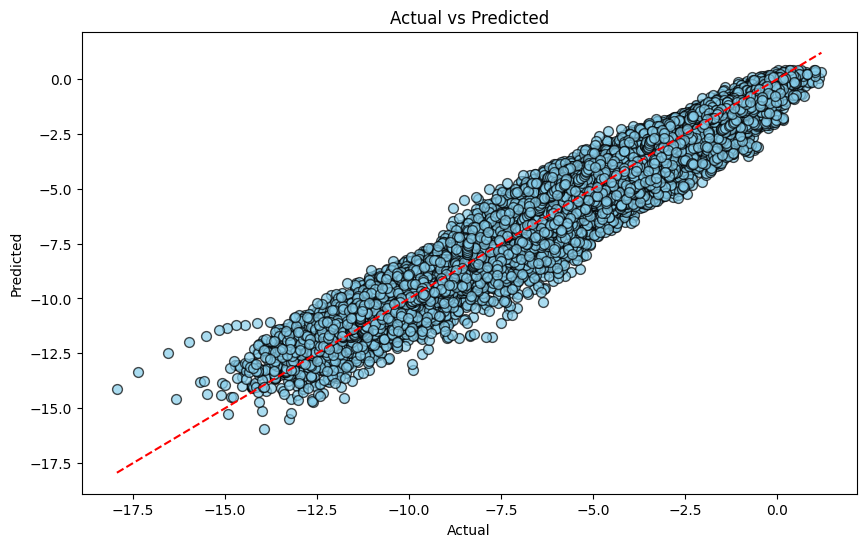

In [ ]:
# Predict reconstructed values from the test set using the decoder
reconstructed_values = best_model.predict(y_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.flatten(), reconstructed_values.flatten(), color='skyblue', marker='o', s=50, alpha=0.7, edgecolors='black')
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Define the model architecture
def build_model():
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation='relu'))
    model.add(Dense(16, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    model.add(Dense(3))
    return model

# Compile the model using the custom loss function
model = build_model()
optimizer = Adam(learning_rate=0.02)
model.compile(optimizer=optimizer, loss='mse', metrics=['R2Score','mae', 'mse', 'mape'])

# Define the checkpoint path
checkpoint_path = 'checkpoints/'

# Create a ModelCheckpoint callback to save the best model
ckpt_callback = ModelCheckpoint(filepath=checkpoint_path,
                                monitor='val_loss',
                                save_best_only=True,
                                save_weights_only=False,  # Save entire model, not just weights
                                verbose=1)

# Train the model using the custom loss function
history = model.fit(X_train, encoded_data_train, batch_size=64, epochs=100, validation_split=0.25, callbacks=[ckpt_callback], verbose=1)

# Load the best model from the checkpoint file
best_model = load_model(checkpoint_path)

Epoch 1/100
127/143 [=========================>....] - ETA: 0s - loss: 0.9215 - r2_score: 0.2451 - mae: 0.6303 - mse: 0.9215 - mape: 269.1470
Epoch 1: val_loss improved from inf to 0.26981, saving model to checkpoints/
143/143 [==============================] - 2s 9ms/step - loss: 0.8516 - r2_score: 0.3125 - mae: 0.6055 - mse: 0.8516 - mape: 256.0404 - val_loss: 0.2698 - val_r2_score: 0.8909 - val_mae: 0.3877 - val_mse: 0.2698 - val_mape: 92.5337
Epoch 2/100
121/143 [========================>.....] - ETA: 0s - loss: 0.2710 - r2_score: 0.8963 - mae: 0.3837 - mse: 0.2710 - mape: 273.1201
Epoch 2: val_loss improved from 0.26981 to 0.25073, saving model to checkpoints/
143/143 [==============================] - 1s 6ms/step - loss: 0.2695 - r2_score: 0.8962 - mae: 0.3829 - mse: 0.2695 - mape: 240.1583 - val_loss: 0.2507 - val_r2_score: 0.9051 - val_mae: 0.3696 - val_mse: 0.2507 - val_mape: 91.4646
Epoch 3/100
142/143 [============================>.] - ETA: 0s - loss: 0.2577 - r2_score: 0.90

In [ ]:
loss, r2score, mae, mse, mape = best_model.evaluate(X_test, encoded_data_test, verbose=0)
print(f"Loss: {loss},'R2' : {r2score}, MAE: {mae}, MSE: {mse}, MAPE: {mape}")

Loss: 0.2519799768924713,'R2' : 0.9043478965759277, MAE: 0.35439807176589966, MSE: 0.2519799768924713, MAPE: 81.97808074951172


In [ ]:
predictions = best_model.predict(X_test)

96/96 [==============================] - 0s 1ms/step


In [ ]:
decoded_data_test = decoder.predict(predictions)
print("Decoded", decoded_data_test)

96/96 [==============================] - 0s 1ms/step
Decoded [[ -2.0644789  -2.0224838  -2.042643  ...  -2.9456959  -3.5476942
   -3.9916298]
 [ -9.285729   -9.239407   -9.270563  ... -10.77652   -11.670929
  -12.367949 ]
 [ -7.298217   -7.2594233  -7.2671776 ...  -9.437684  -10.342799
  -10.99736  ]
 ...
 [-10.541064  -10.4899845 -10.535925  ... -11.622143  -12.509789
  -13.233626 ]
 [ -4.6328816  -4.6095448  -4.6187124 ...  -6.3832474  -7.1480994
   -7.7003756]
 [ -4.547425   -4.5247474  -4.534966  ...  -6.2467146  -7.002329
   -7.549936 ]]


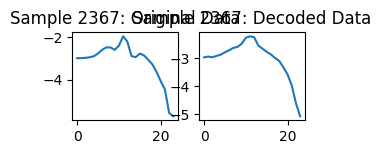

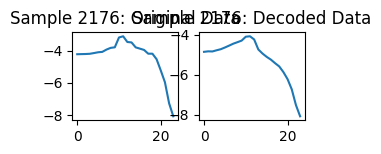

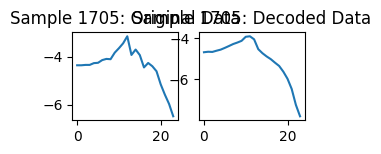

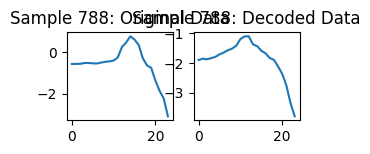

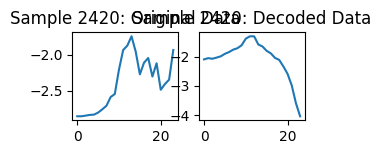

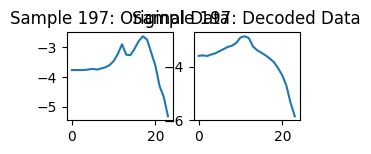

In [ ]:
import random

# Select six random samples from y_test
random_samples_idx = random.sample(range(len(y_test)), 6)


for i, sample_idx in enumerate(random_samples_idx, 1):
    plt.figure(figsize=(3, 8))
    sample = y_test[sample_idx]
    decoded_sample = decoded_data_test[sample_idx]

    plt.subplot(6, 2, 2*i-1)
    plt.plot(range(len(sample)), sample, label='Original Data')
    plt.title(f'Sample {sample_idx}: Original Data')

    plt.subplot(6, 2, 2*i)
    plt.plot(range(len(decoded_sample)), decoded_sample, label='Decoded Data')
    plt.title(f'Sample {sample_idx}: Decoded Data')

# plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sample 32: Decoded Data')

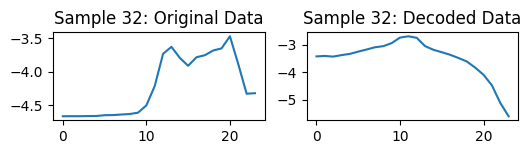

In [ ]:
plt.figure(figsize=(6, 8))
sample_idx = 32
sample = y_test[sample_idx]
decoded_sample = decoded_data_test[sample_idx]

plt.subplot(6, 2, 2*i-1)
plt.plot(range(len(sample)), sample, label='Original Data')
plt.title(f'Sample {sample_idx}: Original Data')

plt.subplot(6, 2, 2*i)
plt.plot(range(len(decoded_sample)), decoded_sample, label='Decoded Data')
plt.title(f'Sample {sample_idx}: Decoded Data')

In [ ]:
print(type(Y_test))
print(type(decoded_data_test))
Y_test_df = pd.DataFrame(Y_test)
second_column_Y_test = Y_test_df.iloc[:, 1]
decoded_data_test = pd.DataFrame(decoded_data_test)
decoded_data_test.insert(0, 'EQID', second_column_Y_test.values)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
y_test_df = np.log(Y_test[:, 2:26])
y_test_df = pd.DataFrame(y_test_df)
second_column_Y_test = Y_test_df.iloc[:, 1]
y_test_df.insert(0, 'EQID', second_column_Y_test.values)
y_test_df

,EQID,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,284.0,-1.980502,-1.980502,-1.973281,-1.951928,-1.903809,-1.864330,-1.845160,-1.771957,-1.754464,...,-3.307707,-3.457768,-3.604538,-3.759302,-3.973898,-4.154095,-4.675593,-5.442188,-6.325540,-6.858965
1,1014.0,-8.811564,-8.804875,-8.804875,-8.798231,-8.791630,-8.765655,-8.804875,-8.791630,-8.778558,...,-7.943393,-8.142187,-8.209708,-8.368773,-8.527244,-8.955698,-9.382316,-9.811820,-10.970601,-11.654489
2,1024.0,-8.330714,-8.318342,-8.326573,-8.318342,-8.306122,-8.274247,-8.250990,-8.235781,-8.159519,...,-7.639643,-7.527652,-7.546414,-7.751725,-7.819058,-8.072507,-8.330714,-8.963480,-9.304651,-10.289150
3,171.0,-4.672379,-4.672379,-4.667046,-4.663859,-4.657517,-4.654360,-4.638727,-4.605170,-4.575611,...,-3.917036,-3.785390,-4.051285,-3.984594,-3.932226,-4.261580,-4.908982,-5.456141,-6.245067,-7.078544
4,1002.0,-5.153352,-5.132803,-5.117664,-5.091303,-4.887533,-4.833326,-4.729600,-4.575611,-4.358310,...,-6.083580,-6.057604,-6.400938,-6.637728,-6.742241,-6.967505,-7.144744,-7.389022,-8.131931,-8.818298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,57.0,-1.801810,-1.801810,-1.783791,-1.748700,-1.619488,-1.505078,-1.231001,-1.027222,-0.957113,...,-1.527858,-1.624552,-1.639897,-1.725972,-1.910543,-1.980502,-2.465104,-3.092243,-4.160484,-4.809737
3043,1031.0,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.330604,-11.322305,...,-10.368703,-10.384754,-10.215462,-10.212734,-10.022271,-10.319003,-10.298013,-10.322038,-11.087658,-11.739826
3044,1118.0,-9.946395,-9.927780,-9.942228,-9.927780,-9.913538,-9.847107,-9.751625,-9.689990,-9.616806,...,-9.633460,-9.984698,-10.234773,-10.245978,-10.404363,-11.281814,-11.571614,-12.064573,-13.457836,-14.158001
3045,329.0,-3.927137,-3.922073,-3.907035,-3.897134,-3.835062,-3.759302,-3.582719,-3.470547,-3.288762,...,-5.504112,-5.983496,-6.336776,-6.571283,-6.742241,-6.725434,-7.385791,-7.870090,-8.715644,-9.161550


In [ ]:
decoded_data_test

,EQID,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,284.0,-2.064479,-2.022484,-2.042643,-2.003770,-1.960807,-1.875068,-1.815400,-1.733722,-1.684894,...,-1.622806,-1.772020,-1.857984,-2.012048,-2.078301,-2.301590,-2.553315,-2.945696,-3.547694,-3.991630
1,1014.0,-9.285729,-9.239407,-9.270563,-9.204722,-9.191258,-9.114436,-9.050035,-8.979192,-8.954761,...,-9.048954,-9.183762,-9.269765,-9.452540,-9.592901,-9.885427,-10.238074,-10.776520,-11.670929,-12.367949
2,1024.0,-7.298217,-7.259423,-7.267178,-7.203406,-7.161373,-7.076624,-6.986214,-6.891372,-6.818014,...,-7.417001,-7.611435,-7.750954,-7.961743,-8.133566,-8.451767,-8.853985,-9.437684,-10.342799,-10.997360
3,171.0,-4.744565,-4.720365,-4.728159,-4.669393,-4.616335,-4.530443,-4.438111,-4.342063,-4.269107,...,-4.806353,-4.966267,-5.101071,-5.273660,-5.435155,-5.714409,-6.062816,-6.561680,-7.338604,-7.896984
4,1002.0,-5.077718,-5.050946,-5.054643,-4.994905,-4.939795,-4.852824,-4.756463,-4.656545,-4.574940,...,-5.216767,-5.396285,-5.541689,-5.729344,-5.899084,-6.193194,-6.564589,-7.093949,-7.906887,-8.483471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,57.0,-1.705868,-1.671610,-1.677130,-1.634086,-1.589131,-1.513406,-1.461672,-1.383912,-1.313297,...,-1.228931,-1.374938,-1.472417,-1.616348,-1.692005,-1.898401,-2.163252,-2.552955,-3.134471,-3.563001
3043,1031.0,-10.280621,-10.230526,-10.273399,-10.206522,-10.207358,-10.134505,-10.083122,-10.024292,-10.024350,...,-9.865860,-9.970821,-10.030037,-10.198787,-10.323400,-10.603074,-10.930907,-11.446701,-12.335751,-13.054024
3044,1118.0,-10.541064,-10.489985,-10.535925,-10.468776,-10.473358,-10.401542,-10.353567,-10.297883,-10.304352,...,-10.079713,-10.176861,-10.229064,-10.394143,-10.514633,-10.790944,-11.112279,-11.622143,-12.509789,-13.233626
3045,329.0,-4.632882,-4.609545,-4.618712,-4.560272,-4.507901,-4.422372,-4.331390,-4.236639,-4.166583,...,-4.668770,-4.822112,-4.953362,-5.120901,-5.279633,-5.553906,-5.894608,-6.383247,-7.148099,-7.700376


In [ ]:
# Exclude the first column and calculate the residuals for the remaining columns
residuals = y_test_df.iloc[:, 1:] - decoded_data_test.iloc[:, 1:]

# Create a new DataFrame for the residuals
residual_df = pd.DataFrame(residuals, columns=y_test_df.columns[1:])

# Append the first column of Y_test at the end of residual_df
residual_df['EQID'] = y_test_df.iloc[:, 0].values

residual_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,EQID
0,0.083977,0.041982,0.069362,0.051842,0.056998,0.010738,-0.029760,-0.038235,-0.069569,-0.070802,...,-1.685748,-1.746554,-1.747254,-1.895597,-1.852505,-2.122277,-2.496492,-2.777845,-2.867335,284.0
1,0.474165,0.434531,0.465688,0.406492,0.399628,0.348782,0.245159,0.187562,0.176203,0.111642,...,1.041574,1.060056,1.083767,1.065658,0.929728,0.855759,0.964699,0.700328,0.713460,1014.0
2,-1.032497,-1.058919,-1.059395,-1.114936,-1.144749,-1.197623,-1.264776,-1.344409,-1.341505,-1.347194,...,0.083783,0.204540,0.210018,0.314507,0.379260,0.523271,0.474204,1.038148,0.708210,1024.0
3,0.072186,0.047986,0.061114,0.005533,-0.041182,-0.123917,-0.200616,-0.263107,-0.306505,-0.416898,...,1.180876,1.049786,1.289066,1.502929,1.452829,1.153835,1.105538,1.093537,0.818440,171.0
4,-0.075634,-0.081857,-0.063021,-0.096399,0.052261,0.019498,0.026862,0.080933,0.216630,0.385717,...,-0.661319,-0.859248,-0.908384,-0.843157,-0.774311,-0.580156,-0.295073,-0.225044,-0.334827,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.095941,-0.130199,-0.106661,-0.114614,-0.030357,0.008328,0.230670,0.356690,0.356184,0.203099,...,-0.249614,-0.167480,-0.109624,-0.218538,-0.082101,-0.301852,-0.539289,-1.026013,-1.246737,57.0
3043,-1.058352,-1.108446,-1.065573,-1.132450,-1.131614,-1.204467,-1.255850,-1.306312,-1.297955,-1.392031,...,-0.413933,-0.185425,-0.013947,0.301129,0.284071,0.632895,1.124663,1.248093,1.314198,1031.0
3044,0.594669,0.562204,0.593697,0.540996,0.559820,0.554434,0.601942,0.607893,0.687546,0.626196,...,0.192163,-0.005709,0.148165,0.110270,-0.490870,-0.459336,-0.442430,-0.948047,-0.924375,1118.0
3045,0.705745,0.687471,0.711677,0.663137,0.672839,0.663070,0.748671,0.766092,0.877821,1.130326,...,-1.161385,-1.383413,-1.450382,-1.462608,-1.171528,-1.491184,-1.486843,-1.567545,-1.461175,329.0


In [ ]:
X_test_temp = scaler.inverse_transform(X_test)

In [ ]:
x_test_df = pd.DataFrame(X_test_temp, columns=[f'x_test_col_{i+1}' for i in range(X_test.shape[1])])

# Concatenate the residual_df with x_test_df
residual_df = pd.concat([residual_df, x_test_df], axis=1)

In [ ]:
residual_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,EQID,x_test_col_1,x_test_col_2,x_test_col_3,x_test_col_4,x_test_col_5,x_test_col_6,x_test_col_7
0,0.083977,0.041982,0.069362,0.051842,0.056998,0.010738,-0.029760,-0.038235,-0.069569,-0.070802,...,-2.777845,-2.867335,284.0,6.30,17.900,20.59,379.28,2.0,2.578960,1.313656
1,0.474165,0.434531,0.465688,0.406492,0.399628,0.348782,0.245159,0.187562,0.176203,0.111642,...,0.700328,0.713460,1014.0,4.59,10.662,363.88,448.00,4.0,2.651278,2.560958
2,-1.032497,-1.058919,-1.059395,-1.114936,-1.144749,-1.197623,-1.264776,-1.344409,-1.341505,-1.347194,...,1.038148,0.708210,1024.0,4.40,6.957,98.32,560.60,0.0,2.748653,1.992642
3,0.072186,0.047986,0.061114,0.005533,-0.041182,-0.123917,-0.200616,-0.263107,-0.306505,-0.416898,...,1.093537,0.818440,171.0,5.90,8.000,105.24,782.59,2.0,2.893534,2.022181
4,-0.075634,-0.081857,-0.063021,-0.096399,0.052261,0.019498,0.026862,0.080933,0.216630,0.385717,...,-0.225044,-0.334827,1002.0,5.39,14.890,127.07,611.00,3.0,2.786041,2.104043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.095941,-0.130199,-0.106661,-0.114614,-0.030357,0.008328,0.230670,0.356690,0.356184,0.203099,...,-1.026013,-1.246737,57.0,5.69,14.000,2.91,382.12,0.0,2.582200,0.463893
3043,-1.058352,-1.108446,-1.065573,-1.132450,-1.131614,-1.204467,-1.255850,-1.306312,-1.297955,-1.392031,...,1.248093,1.314198,1031.0,4.25,3.694,244.15,652.29,0.0,2.814441,2.387657
3044,0.594669,0.562204,0.593697,0.540996,0.559820,0.554434,0.601942,0.607893,0.687546,0.626196,...,-0.948047,-0.924375,1118.0,4.06,9.762,239.16,586.00,0.0,2.767898,2.378689
3045,0.705745,0.687471,0.711677,0.663137,0.672839,0.663070,0.748671,0.766092,0.877821,1.130326,...,-1.567545,-1.461175,329.0,4.90,1.800,39.65,475.59,0.0,2.677233,1.598243


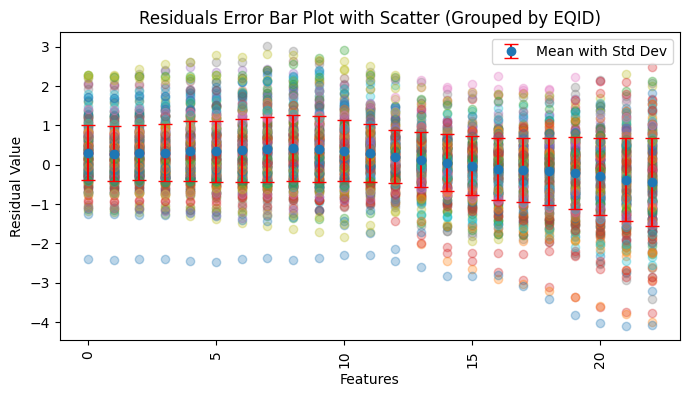

In [ ]:
grouped_residuals = residual_df.groupby('EQID').mean().iloc[:, :-8]

# Plotting the error bar plot and scatter plot
means = grouped_residuals.mean()
stds = grouped_residuals.std()

plt.figure(figsize=(8, 4))

# Error bar plot
plt.errorbar(x=means.index, y=means.values, yerr=stds.values, fmt='o', ecolor='r', capsize=5, label='Mean with Std Dev')

# Scatter plot
for i in range(grouped_residuals.shape[0]):
    plt.scatter(x=grouped_residuals.columns, y=grouped_residuals.iloc[i, :], alpha=0.3)

plt.xticks(rotation=90)
plt.title('Residuals Error Bar Plot with Scatter (Grouped by EQID)')
plt.ylabel('Residual Value')
plt.xlabel('Features')
plt.legend()
plt.show()

In [ ]:
grouped_residuals

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
EQID,,,,,,,,,,,,,,,,,,,,,
1.0,-0.202366,-0.197379,-0.188573,-0.160115,0.033310,0.142378,0.257622,0.322029,0.237999,0.045536,...,-0.844077,-1.049340,-1.001108,-0.951851,-0.741057,-0.651504,-0.630719,-0.714309,-0.822608,-1.101969
4.0,-0.468763,-0.478138,-0.439281,-0.452822,-0.373816,-0.365379,-0.345055,-0.291098,-0.108642,-0.034535,...,-0.666623,-0.991702,-1.106584,-1.128988,-1.306623,-1.371857,-1.482724,-1.927875,-2.333782,-2.608982
9.0,-0.290958,-0.323695,-0.291753,-0.328617,-0.347882,-0.323479,-0.246758,-0.071132,-0.090412,-0.055936,...,0.135612,-0.253306,-0.326784,-0.090949,-0.145644,-0.190483,0.039904,0.571994,0.444278,-0.080212
12.0,0.155850,0.118585,0.131956,0.106124,0.081053,0.019061,0.043617,-0.021445,-0.002464,0.013046,...,0.431776,0.286224,0.416192,0.527780,0.505060,0.179832,0.255556,0.382318,0.176271,0.329779
13.0,0.941702,0.927616,0.953559,0.900963,0.912528,0.921713,0.820204,0.830969,0.789424,0.763366,...,1.020233,0.991050,1.246975,1.303487,1.191310,1.284577,1.384515,1.094475,1.012218,1.045297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208.0,-0.058962,-0.071355,-0.064954,-0.106665,-0.095495,-0.096187,-0.143112,-0.050921,0.196476,0.322547,...,-0.846310,-0.689481,-0.639748,-0.632185,-0.661908,-0.686265,-0.665008,-0.696676,-0.846690,-1.072776
1221.0,0.171218,0.147561,0.159715,0.127477,0.144983,0.126871,0.136525,0.173599,0.200841,0.205783,...,0.289035,0.225997,0.149818,0.007236,-0.000061,0.016908,-0.080358,-0.150891,-0.344566,-0.530051
1226.0,0.317202,0.281861,0.297455,0.236626,0.219312,0.148938,0.098536,0.033453,0.032019,-0.091495,...,1.421028,1.083265,0.872938,0.736271,0.968870,1.066687,1.655130,2.121219,1.800398,1.384172


In [ ]:
grouped_residuals = residual_df.groupby('EQID').mean()
residual_first = grouped_residuals[grouped_residuals.columns[0]]
residual_seventh_from_last = grouped_residuals[grouped_residuals.columns[-7]]

# Create a DataFrame for these residuals
residuals_to_plot = pd.DataFrame(residual_first)
residuals_to_plot.insert(1, 'Magnitude', residual_seventh_from_last.values)

residuals_to_plot

,0,Magnitude
EQID,,
1.0,-0.202366,6.00
4.0,-0.468763,5.00
9.0,-0.290958,6.50
12.0,0.155850,7.36
13.0,0.941702,5.20
...,...,...
1208.0,-0.058962,4.01
1221.0,0.171218,4.05
1226.0,0.317202,4.51


In [ ]:
residuals_to_plot.rename(columns={residuals_to_plot.columns[0]: 'PGA'}, inplace=True)
residuals_to_plot

,PGA,Magnitude
EQID,,
1.0,-0.202366,6.00
4.0,-0.468763,5.00
9.0,-0.290958,6.50
12.0,0.155850,7.36
13.0,0.941702,5.20
...,...,...
1208.0,-0.058962,4.01
1221.0,0.171218,4.05
1226.0,0.317202,4.51


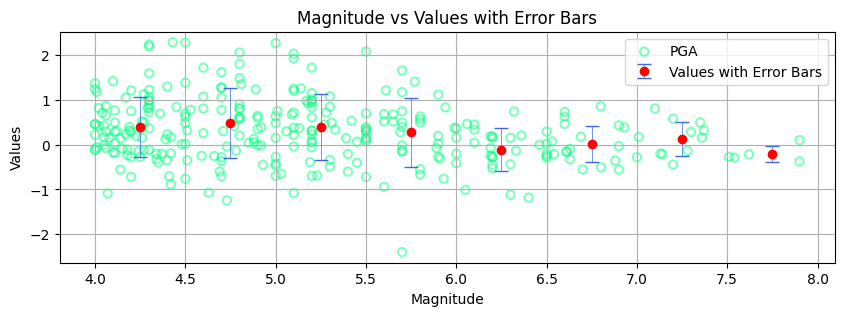

In [ ]:
mean_values_to_plot = []
std_values_to_plot = []
for magnitude_range in [(4, 4.5),(4.5,5),(5,5.5), (5.5, 6), (6, 6.5),(6.5,7),(7,7.5), (7.5, 8)]:
    subset = residuals_to_plot[(residuals_to_plot['Magnitude'] >= magnitude_range[0]) &
                                (residuals_to_plot['Magnitude'] < magnitude_range[1])]
    mean_values_to_plot.append(subset['PGA'].mean())
    std_values_to_plot.append(subset['PGA'].std())

magnitudes_to_plot = [4.25, 4.75, 5.25, 5.75, 6.25, 6.75,7.25, 7.75]

# Plot scatter plot with error bars
plt.figure(figsize=(10, 3))
plt.errorbar(magnitudes_to_plot, mean_values_to_plot, yerr=std_values_to_plot, fmt='o', capsize=5, label='Values with Error Bars', color='royalblue', markerfacecolor='red', markeredgecolor='red',linewidth=0.5)
plt.scatter(residuals_to_plot['Magnitude'], residuals_to_plot['PGA'], label='PGA', color='none', edgecolors='springgreen', alpha=0.5, linewidth=1.5)
plt.xlabel('Magnitude')
plt.ylabel('Values')
plt.title('Magnitude vs Values with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming x_test and y_test are DataFrames
y_test_df = pd.DataFrame(y_test)
X_test_df = pd.DataFrame(X_test)
inter_df = pd.concat([y_test_df, X_test_df], axis=1)
second_column_Y_test = Y_test_df.iloc[:, 1]
inter_df = pd.DataFrame(inter_df)
inter_df.insert(0, 'EQID', second_column_Y_test.values)
inter_df

,EQID,0,1,2,3,4,5,6,7,8,...,21,22,23,0,1,2,3,4,5,6
0,284.0,-1.980502,-1.980502,-1.973281,-1.951928,-1.903809,-1.864330,-1.845160,-1.771957,-1.754464,...,-5.442188,-6.325540,-6.858965,0.776711,2.052342,-1.075386,-0.378665,0.721795,-0.244332,-1.380938
1,1014.0,-8.811564,-8.804875,-8.804875,-8.798231,-8.791630,-8.765655,-8.804875,-8.791630,-8.778558,...,-9.811820,-10.970601,-11.654489,-0.740350,0.139608,2.624889,-0.023102,2.306198,0.176891,1.482480
2,1024.0,-8.330714,-8.318342,-8.326573,-8.318342,-8.306122,-8.274247,-8.250990,-8.235781,-8.159519,...,-8.963480,-9.304651,-10.289150,-0.908912,-0.839486,-0.237545,0.559500,-0.862608,0.744060,0.177802
3,171.0,-4.672379,-4.672379,-4.667046,-4.663859,-4.657517,-4.654360,-4.638727,-4.605170,-4.575611,...,-5.456141,-6.245067,-7.078544,0.421843,-0.563860,-0.162956,1.708095,0.721795,1.587933,0.245614
4,1002.0,-5.153352,-5.132803,-5.117664,-5.091303,-4.887533,-4.833326,-4.729600,-4.575611,-4.358310,...,-7.389022,-8.131931,-8.818298,-0.030614,1.256911,0.072347,0.820274,1.513997,0.961830,0.433544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,57.0,-1.801810,-1.801810,-1.783791,-1.748700,-1.619488,-1.505078,-1.231001,-1.027222,-0.957113,...,-3.092243,-4.160484,-4.809737,0.235537,1.021717,-1.265957,-0.363970,-0.862608,-0.225461,-3.331732
3043,1031.0,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.330604,-11.322305,...,-10.322038,-11.087658,-11.739826,-1.041988,-1.701775,1.334336,1.033912,-0.862608,1.127245,1.084634
3044,1118.0,-9.946395,-9.927780,-9.942228,-9.927780,-9.913538,-9.847107,-9.751625,-9.689990,-9.616806,...,-12.064573,-13.457836,-14.158001,-1.210550,-0.098229,1.280549,0.690922,-0.862608,0.856151,1.064045
3045,329.0,-3.927137,-3.922073,-3.907035,-3.897134,-3.835062,-3.759302,-3.582719,-3.470547,-3.288762,...,-7.870090,-8.715644,-9.161550,-0.465327,-2.202289,-0.869941,0.119651,-0.862608,0.328066,-0.727615


In [ ]:
inter_df = inter_df.groupby('EQID').mean()
inter_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,0,1,2,3,4,5,6
EQID,,,,,,,,,,,,,,,,,,,,,
1.0,-1.851509,-1.820159,-1.807889,-1.731606,-1.491655,-1.313044,-1.148854,-1.007858,-1.010601,-1.130103,...,-3.327018,-4.179902,-4.829565,0.510560,-1.092385,-1.275011,0.728951,-0.862608,0.887682,-3.671316
4.0,-3.995405,-3.989985,-3.973898,-3.932226,-3.807663,-3.717279,-3.619353,-3.483493,-3.259698,-3.074775,...,-6.949619,-7.870090,-8.709565,-0.376610,1.550243,-0.947657,-1.236735,-0.862608,-1.698638,-0.927713
9.0,-2.952673,-2.950759,-2.943140,-2.935578,-2.911391,-2.798522,-2.653562,-2.391416,-2.376232,-2.234926,...,-3.196625,-4.342806,-4.456750,0.954145,-0.563860,-0.684221,-1.236735,-0.862608,-1.698638,-0.367843
12.0,-1.801810,-1.795767,-1.801810,-1.789761,-1.771957,-1.748700,-1.666008,-1.650260,-1.579879,-1.465338,...,-2.645075,-3.090043,-3.547380,1.717111,1.452465,-0.883199,-0.346844,0.721795,-0.203644,-0.759034
13.0,-2.682382,-2.680922,-2.676552,-2.673649,-2.615927,-2.524479,-2.547208,-2.453408,-2.451085,-2.368725,...,-3.759302,-4.382027,-5.316481,-0.199176,-0.035334,-0.837173,-1.206363,-0.862608,-1.630009,-0.653963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208.0,-6.881976,-6.858850,-6.863644,-6.842781,-6.790453,-6.707215,-6.666962,-6.483081,-6.169612,-5.971898,...,-9.617452,-10.708620,-11.463865,-1.254909,-0.264714,-0.567019,0.211026,-0.862608,0.305149,-0.557199
1221.0,-6.172474,-6.162370,-6.155413,-6.125549,-6.059693,-5.991857,-5.888381,-5.753481,-5.647623,-5.576477,...,-8.806044,-9.860863,-10.550389,-1.219422,0.231571,-0.676048,0.025891,-0.862608,0.110636,-0.635599
1226.0,-8.394976,-8.386165,-8.394976,-8.390561,-8.386165,-8.377431,-8.355925,-8.343240,-8.306122,-8.351679,...,-8.589764,-9.903488,-10.919599,-0.811324,-1.209190,0.841311,-0.121409,0.721795,0.067268,0.877808


In [ ]:
inter_X = inter_df.values[:, 24:]
inter_y = inter_df.values[:, :24]
print(inter_X.shape)
print(inter_y.shape)

(296, 7)
(296, 24)


In [ ]:
inter_data = best_model.predict(inter_X)
inter_data = decoder.predict(inter_data)
inter_data = pd.DataFrame(inter_data)
inter_data.insert(0, 'EQID', inter_df.index)
inter_data

10/10 [==============================] - 0s 4ms/step


,EQID,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1.0,-1.649144,-1.622780,-1.619316,-1.571490,-1.524965,-1.455422,-1.406475,-1.329887,-1.248600,...,-1.176284,-1.311528,-1.420084,-1.551577,-1.641131,-1.837921,-2.114215,-2.504410,-3.077933,-3.502881
1,4.0,-3.526642,-3.511847,-3.534618,-3.479404,-3.433847,-3.351900,-3.274298,-3.192395,-3.151056,...,-3.305983,-3.394226,-3.490282,-3.607794,-3.739151,-3.964093,-4.228464,-4.615837,-5.261108,-5.752934
2,9.0,-2.661715,-2.627064,-2.651387,-2.606961,-2.563509,-2.475043,-2.406804,-2.320284,-2.285819,...,-2.308050,-2.431508,-2.526346,-2.664439,-2.752657,-2.983044,-3.241304,-3.640903,-4.262594,-4.728710
3,12.0,-1.957659,-1.914352,-1.933766,-1.895885,-1.853010,-1.767761,-1.709625,-1.628815,-1.577415,...,-1.500247,-1.654066,-1.738442,-1.895362,-1.957688,-2.179705,-2.430261,-2.821347,-3.419822,-3.859789
4,13.0,-3.624085,-3.608538,-3.630111,-3.574612,-3.528455,-3.446193,-3.367412,-3.284377,-3.240509,...,-3.426024,-3.520001,-3.619157,-3.741076,-3.874844,-4.104132,-4.375226,-4.771520,-5.427324,-5.924475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1208.0,-6.881723,-6.844507,-6.847357,-6.784019,-6.735998,-6.649590,-6.553729,-6.453857,-6.370247,...,-7.075017,-7.281945,-7.432679,-7.649339,-7.827754,-8.151336,-8.563942,-9.157124,-10.064483,-10.710146
292,1221.0,-6.379953,-6.344637,-6.341579,-6.278764,-6.223530,-6.135121,-6.032693,-5.926763,-5.830802,...,-6.663012,-6.884993,-7.049238,-7.272970,-7.459329,-7.789392,-8.214512,-8.819119,-9.729181,-10.364124
293,1226.0,-8.712177,-8.668026,-8.692430,-8.627187,-8.605477,-8.526369,-8.454461,-8.376693,-8.338141,...,-8.578008,-8.730023,-8.831470,-9.022329,-9.171770,-9.471704,-9.838655,-10.390162,-11.287660,-11.972425
294,1230.0,-6.800866,-6.763955,-6.765854,-6.702600,-6.653417,-6.566686,-6.469767,-6.368918,-6.283319,...,-7.008625,-7.217978,-7.370889,-7.588688,-7.768384,-8.093010,-8.507633,-9.102656,-10.010450,-10.654386


In [ ]:
X_test_temp = scaler.inverse_transform(inter_X)

In [ ]:
# Exclude the first column and calculate the residuals for the remaining columns
inter_y = pd.DataFrame(inter_y)
residuals = inter_y.iloc[:, 1:] - inter_data.iloc[:, 1:]

# Create a new DataFrame for the residuals
inter_residual_df = pd.DataFrame(residuals, columns = inter_y.columns[1:])

# Append the first column of Y_test at the end of residual_df
inter_residual_df['EQID'] = inter_data.iloc[:, 0].values

inter_residual_df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,EQID
0,-0.197379,-0.188573,-0.160115,0.033310,0.142378,0.257622,0.322029,0.237999,0.045536,0.107032,...,-1.001108,-0.951851,-0.741057,-0.651504,-0.630719,-0.714309,-0.822608,-1.101969,-1.326684,1.0
1,-0.478138,-0.439281,-0.452822,-0.373816,-0.365379,-0.345055,-0.291098,-0.108642,-0.034535,-0.128432,...,-1.106584,-1.128988,-1.306623,-1.371857,-1.482724,-1.927875,-2.333782,-2.608982,-2.956631,4.0
2,-0.323695,-0.291753,-0.328617,-0.347882,-0.323479,-0.246758,-0.071132,-0.090412,-0.055936,-0.204431,...,-0.326784,-0.090949,-0.145644,-0.190483,0.039904,0.571994,0.444278,-0.080212,0.271960,9.0
3,0.118585,0.131956,0.106124,0.081053,0.019061,0.043617,-0.021445,-0.002464,0.013046,0.090045,...,0.416192,0.527780,0.505060,0.179832,0.255556,0.382318,0.176271,0.329779,0.312409,12.0
4,0.927616,0.953559,0.900963,0.912528,0.921713,0.820204,0.830969,0.789424,0.763366,1.293744,...,1.246975,1.303487,1.191310,1.284577,1.384515,1.094475,1.012218,1.045297,0.607994,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.014343,-0.016286,-0.058762,-0.054455,-0.057625,-0.113233,-0.029223,0.200636,0.339200,0.255525,...,-0.405772,-0.377744,-0.386031,-0.396089,-0.354006,-0.351880,-0.460329,-0.644137,-0.753719,1208.0
292,0.182267,0.186167,0.153215,0.163837,0.143264,0.144312,0.173282,0.183179,0.200331,0.245120,...,0.358681,0.236305,0.249887,0.280914,0.203917,0.166356,0.013076,-0.131682,-0.186265,1221.0
293,0.281861,0.297455,0.236626,0.219312,0.148938,0.098536,0.033453,0.032019,-0.091495,-0.044378,...,0.872938,0.736271,0.968870,1.066687,1.655130,2.121219,1.800398,1.384172,1.052827,1226.0
294,-1.111384,-1.122731,-1.175375,-1.208851,-1.267411,-1.349292,-1.291734,-1.143631,-0.824320,-0.887887,...,-0.547799,-0.827850,-0.758762,-0.821379,-0.745767,-1.075221,-1.366465,-1.472916,-1.648198,1230.0


In [ ]:
x_test_df = pd.DataFrame(X_test_temp, columns=[f'x_test_col_{i+1}' for i in range(X_test.shape[1])])

# Concatenate the residual_df with x_test_df
inter_residual_df = pd.concat([inter_residual_df, x_test_df], axis=1)

In [ ]:
inter_residual_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,EQID,x_test_col_1,x_test_col_2,x_test_col_3,x_test_col_4,x_test_col_5,x_test_col_6,x_test_col_7
0,-0.197379,-0.188573,-0.160115,0.033310,0.142378,0.257622,0.322029,0.237999,0.045536,0.107032,...,-1.101969,-1.326684,1.0,6.579871,7.321353,0.820801,538.086688,0.371536,2.731759,0.250190
1,-0.478138,-0.439281,-0.452822,-0.373816,-0.365379,-0.345055,-0.291098,-0.108642,-0.034535,-0.128432,...,-2.608982,-2.956631,4.0,5.640347,14.476603,30.963377,198.152532,0.371536,2.293749,1.482035
2,-0.323695,-0.291753,-0.328617,-0.347882,-0.323479,-0.246758,-0.071132,-0.090412,-0.055936,-0.204431,...,-0.080212,0.271960,9.0,7.049632,8.752403,55.220358,198.152532,0.371536,2.293749,1.733410
3,0.118585,0.131956,0.106124,0.081053,0.019061,0.043617,-0.021445,-0.002464,0.013046,0.090045,...,0.329779,0.312409,12.0,7.857622,14.211859,36.898595,352.044968,1.961639,2.546936,1.557770
4,0.927616,0.953559,0.900963,0.912528,0.921713,0.820204,0.830969,0.789424,0.763366,1.293744,...,1.045297,0.607994,13.0,5.828252,10.183453,41.136620,203.404864,0.371536,2.305372,1.604945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.014343,-0.016286,-0.058762,-0.054455,-0.057625,-0.113233,-0.029223,0.200636,0.339200,0.255525,...,-0.644137,-0.753719,1208.0,4.710219,9.562377,66.012267,448.519662,0.371536,2.633103,1.648391
292,0.182267,0.186167,0.153215,0.163837,0.143264,0.144312,0.173282,0.183179,0.200331,0.245120,...,-0.131682,-0.186265,1221.0,4.747800,10.906133,55.972956,416.503669,0.371536,2.600161,1.613190
293,0.281861,0.297455,0.236626,0.219312,0.148938,0.098536,0.033453,0.032019,-0.091495,-0.044378,...,1.384172,1.052827,1226.0,5.179981,7.005091,195.690515,391.030337,1.961639,2.592817,2.292692
294,-1.111384,-1.122731,-1.175375,-1.208851,-1.267411,-1.349292,-1.291734,-1.143631,-0.824320,-0.887887,...,-1.472916,-1.648198,1230.0,4.766591,7.343534,63.001649,282.762502,1.961639,2.450863,1.791212


In [ ]:
grouped_residuals_inter = inter_residual_df.groupby('EQID').mean()
residual_first = grouped_residuals_inter[grouped_residuals_inter.columns[0]]
residual_seventh_from_last = grouped_residuals_inter[grouped_residuals.columns[-7]]

# Create a DataFrame for these residuals
inter_residuals_to_plot = pd.DataFrame(residual_first)
inter_residuals_to_plot.insert(1, 'Magnitude', residual_seventh_from_last.values)

inter_residuals_to_plot

,1,Magnitude
EQID,,
1.0,-0.197379,6.579871
4.0,-0.478138,5.640347
9.0,-0.323695,7.049632
12.0,0.118585,7.857622
13.0,0.927616,5.828252
...,...,...
1208.0,-0.014343,4.710219
1221.0,0.182267,4.747800
1226.0,0.281861,5.179981


In [ ]:
inter_residuals_to_plot.rename(columns={inter_residuals_to_plot.columns[0]: 'PGA'}, inplace=True)
inter_residuals_to_plot

,PGA,Magnitude
EQID,,
1.0,-0.197379,6.579871
4.0,-0.478138,5.640347
9.0,-0.323695,7.049632
12.0,0.118585,7.857622
13.0,0.927616,5.828252
...,...,...
1208.0,-0.014343,4.710219
1221.0,0.182267,4.747800
1226.0,0.281861,5.179981


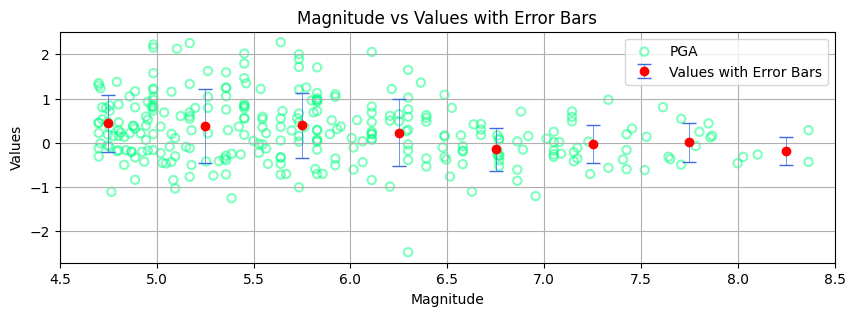

In [ ]:
mean_values_to_plot = []
std_values_to_plot = []
for magnitude_range in [(4, 4.5),(4.5,5),(5,5.5), (5.5, 6), (6, 6.5),(6.5,7),(7,7.5), (7.5, 8),(8,8.5)]:
    subset = inter_residuals_to_plot[(inter_residuals_to_plot['Magnitude'] >= magnitude_range[0]) &
                                (inter_residuals_to_plot['Magnitude'] < magnitude_range[1])]
    mean_values_to_plot.append(subset['PGA'].mean())
    std_values_to_plot.append(subset['PGA'].std())

magnitudes_to_plot = [4.25, 4.75, 5.25, 5.75, 6.25, 6.75,7.25, 7.75,8.25]

# Plot scatter plot with error bars
plt.figure(figsize=(10, 3))
plt.errorbar(magnitudes_to_plot, mean_values_to_plot, yerr=std_values_to_plot, fmt='o', capsize=5, label='Values with Error Bars', color='royalblue', markerfacecolor='red', markeredgecolor='red',linewidth=0.5)
plt.scatter(inter_residuals_to_plot['Magnitude'], inter_residuals_to_plot['PGA'], label='PGA', color='none', edgecolors='springgreen', alpha=0.5, linewidth=1.5)
plt.xlabel('Magnitude')
plt.ylabel('Values')
plt.xlim(4.5, 8.5)  # Set x-axis limits from 4 to 8
plt.title('Magnitude vs Values with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming x_test and y_test are DataFrames
y_test_df = pd.DataFrame(y_test)
X_test_df = pd.DataFrame(X_test)
ss_df = pd.concat([y_test_df, X_test_df], axis=1)
second_column_Y_test = Y_test_df.iloc[:, 0]
ss_df = pd.DataFrame(ss_df)
ss_df.insert(0, 'SID', second_column_Y_test.values)
ss_df

,SID,0,1,2,3,4,5,6,7,8,...,21,22,23,0,1,2,3,4,5,6
0,2188.0,-1.980502,-1.980502,-1.973281,-1.951928,-1.903809,-1.864330,-1.845160,-1.771957,-1.754464,...,-5.442188,-6.325540,-6.858965,0.776711,2.052342,-1.075386,-0.378665,0.721795,-0.244332,-1.380938
1,100177.0,-8.811564,-8.804875,-8.804875,-8.798231,-8.791630,-8.765655,-8.804875,-8.791630,-8.778558,...,-9.811820,-10.970601,-11.654489,-0.740350,0.139608,2.624889,-0.023102,2.306198,0.176891,1.482480
2,100552.0,-8.330714,-8.318342,-8.326573,-8.318342,-8.306122,-8.274247,-8.250990,-8.235781,-8.159519,...,-8.963480,-9.304651,-10.289150,-0.908912,-0.839486,-0.237545,0.559500,-0.862608,0.744060,0.177802
3,799.0,-4.672379,-4.672379,-4.667046,-4.663859,-4.657517,-4.654360,-4.638727,-4.605170,-4.575611,...,-5.456141,-6.245067,-7.078544,0.421843,-0.563860,-0.162956,1.708095,0.721795,1.587933,0.245614
4,3055.0,-5.153352,-5.132803,-5.117664,-5.091303,-4.887533,-4.833326,-4.729600,-4.575611,-4.358310,...,-7.389022,-8.131931,-8.818298,-0.030614,1.256911,0.072347,0.820274,1.513997,0.961830,0.433544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,429.0,-1.801810,-1.801810,-1.783791,-1.748700,-1.619488,-1.505078,-1.231001,-1.027222,-0.957113,...,-3.092243,-4.160484,-4.809737,0.235537,1.021717,-1.265957,-0.363970,-0.862608,-0.225461,-3.331732
3043,100210.0,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.338972,-11.330604,-11.322305,...,-10.322038,-11.087658,-11.739826,-1.041988,-1.701775,1.334336,1.033912,-0.862608,1.127245,1.084634
3044,100395.0,-9.946395,-9.927780,-9.942228,-9.927780,-9.913538,-9.847107,-9.751625,-9.689990,-9.616806,...,-12.064573,-13.457836,-14.158001,-1.210550,-0.098229,1.280549,0.690922,-0.862608,0.856151,1.064045
3045,2231.0,-3.927137,-3.922073,-3.907035,-3.897134,-3.835062,-3.759302,-3.582719,-3.470547,-3.288762,...,-7.870090,-8.715644,-9.161550,-0.465327,-2.202289,-0.869941,0.119651,-0.862608,0.328066,-0.727615


In [ ]:
ss_df = ss_df.groupby('SID').mean()
ss_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,0,1,2,3,4,5,6
SID,,,,,,,,,,,,,,,,,,,,,
8.0,-1.514128,-1.505078,-1.456717,-1.452434,-1.244795,-0.818710,-0.225647,-0.562119,-0.886732,-1.016111,...,-4.729600,-5.513989,-6.023988,-0.296765,0.493191,-1.248064,0.148005,0.721795,0.357046,-2.881723
10.0,-2.162823,-2.162823,-2.154165,-2.145581,-2.120264,-2.095571,-1.958995,-1.877317,-1.877317,-1.814005,...,-4.374058,-5.234404,-5.843045,-0.296765,0.493191,-1.225751,-1.065628,0.721795,-1.334260,-2.509243
19.0,-4.104395,-4.104395,-4.098353,-4.092347,-4.086376,-4.074542,-4.039856,-4.028557,-3.989985,-3.989985,...,-4.575611,-5.511511,-6.165818,0.687994,-1.092385,-0.612542,-0.273476,0.721795,-0.112252,-0.257606
22.0,-3.170086,-3.167708,-3.162968,-3.151217,-3.141915,-3.132698,-3.079114,-3.070456,-2.987764,-2.911391,...,-5.053021,-5.549346,-6.287179,0.687994,-1.092385,-0.843425,0.124980,0.721795,0.333538,-0.667601
28.0,-2.439551,-2.429283,-2.438405,-2.434974,-2.415754,-2.401301,-2.414635,-2.347582,-2.273026,-2.071473,...,-3.291447,-4.068677,-4.964706,0.421843,0.255355,-1.024510,-0.740178,0.721795,-0.759374,-1.175162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100622.0,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,-10.829829,...,-9.630412,-9.664471,-9.905490,0.022616,-0.699691,3.608999,1.591213,-0.862608,1.513840,1.705678
100623.0,-14.277546,-14.275960,-14.277546,-14.275960,-14.274376,-14.274376,-14.272795,-14.261798,-14.229512,-14.182236,...,-13.437074,-13.995834,-13.952476,-1.086346,-1.586293,3.767771,1.033912,-0.862608,1.127245,1.737431
100624.0,-10.729024,-10.719933,-10.729024,-10.724468,-10.715418,-10.710924,-10.701995,-10.701995,-10.684374,-10.675678,...,-10.886987,-11.227747,-11.081143,-0.820195,-0.832087,1.427789,1.591213,-0.862608,1.513840,1.119424


In [ ]:
ss_X = ss_df.values[:, 24:]
ss_y = ss_df.values[:, :24]
print(ss_X.shape)
print(ss_y.shape)

(1670, 7)
(1670, 24)


In [ ]:
ss_data = best_model.predict(ss_X)
ss_data = decoder.predict(ss_data)
ss_data = pd.DataFrame(ss_data)
ss_data.insert(0, 'SID', ss_df.index)
ss_data

53/53 [==============================] - 0s 5ms/step


,SID,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,8.0,-2.417940,-2.380287,-2.402914,-2.360755,-2.317504,-2.230147,-2.165405,-2.080856,-2.040540,...,-2.028353,-2.162324,-2.253547,-2.398159,-2.477407,-2.704904,-2.960499,-3.357163,-3.970820,-4.427886
1,10.0,-2.317921,-2.279039,-2.300967,-2.259738,-2.216569,-2.129670,-2.066363,-1.982627,-1.939902,...,-1.913594,-2.051879,-2.141613,-2.288900,-2.364471,-2.590777,-2.845278,-3.240729,-3.851087,-4.304438
2,19.0,-3.669951,-3.654050,-3.675058,-3.619426,-3.572987,-3.490576,-3.411241,-3.327674,-3.282614,...,-3.482527,-3.579204,-3.679819,-3.803811,-3.938715,-4.170048,-4.444307,-4.844799,-5.505561,-6.005219
3,22.0,-3.058213,-3.033430,-3.057302,-3.007693,-2.963369,-2.878160,-2.805661,-2.721680,-2.684513,...,-2.763573,-2.868406,-2.963044,-3.089982,-3.198603,-3.425225,-3.684743,-4.076103,-4.706589,-5.183869
4,28.0,-2.351174,-2.312701,-2.334861,-2.293323,-2.250126,-2.163074,-2.099291,-2.015285,-1.973360,...,-1.951748,-2.088598,-2.178827,-2.325225,-2.402018,-2.628720,-2.883585,-3.279439,-3.890894,-4.345480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,100622.0,-10.484822,-10.433955,-10.479234,-10.412145,-10.415915,-10.343876,-10.295165,-10.238800,-10.243887,...,-10.033531,-10.132367,-10.186085,-10.351957,-10.473337,-10.750373,-11.073112,-11.584257,-12.472205,-13.194841
1666,100623.0,-13.231645,-13.176032,-13.253927,-13.183067,-13.226071,-13.158447,-13.156573,-13.125961,-13.199100,...,-12.296899,-12.320644,-12.304219,-12.425278,-12.507320,-12.753264,-13.009971,-13.446686,-14.330235,-15.106442
1667,100624.0,-9.990312,-9.941319,-9.980774,-9.914198,-9.910863,-9.836850,-9.781669,-9.719333,-9.712246,...,-9.627487,-9.741159,-9.808190,-9.981034,-10.110242,-10.393666,-10.728739,-11.251143,-12.141756,-12.853827
1668,100626.0,-9.153814,-9.107991,-9.137596,-9.071892,-9.056531,-8.979183,-8.913055,-8.840619,-8.812941,...,-8.940638,-9.079404,-9.168960,-9.353594,-9.496042,-9.790273,-10.146209,-10.687658,-11.582778,-12.276979


In [ ]:
X_test_temp = scaler.inverse_transform(ss_X)

In [ ]:
# Exclude the first column and calculate the residuals for the remaining columns
ss_y = pd.DataFrame(ss_y)
residuals = ss_y.iloc[:, 1:] - ss_data.iloc[:, 1:]

# Create a new DataFrame for the residuals
ss_residual_df = pd.DataFrame(residuals, columns = ss_y.columns[1:])

# Append the first column of Y_test at the end of residual_df
ss_residual_df['SID'] = ss_data.iloc[:, 0].values

ss_residual_df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,SID
0,0.875210,0.946197,0.908321,1.072709,1.411436,1.939758,1.518737,1.153808,0.920298,0.744142,...,-0.769495,-0.897670,-0.942884,-0.955282,-0.929488,-1.119943,-1.372437,-1.543168,-1.596102,8.0
1,0.116216,0.146802,0.114157,0.096305,0.034099,0.107367,0.105309,0.062584,0.022874,-0.109992,...,-0.076753,-0.235695,-0.380410,-0.586288,-0.876560,-0.957891,-1.133329,-1.383317,-1.538607,10.0
2,-0.450345,-0.423294,-0.472920,-0.513389,-0.583966,-0.628616,-0.700883,-0.707370,-0.814659,-0.700002,...,0.115066,0.176589,0.217488,0.477767,0.112999,0.182727,0.269188,-0.005949,-0.160599,19.0
3,-0.134278,-0.105666,-0.143524,-0.178546,-0.254538,-0.273453,-0.348776,-0.303251,-0.336264,0.068129,...,-0.135358,-0.133614,0.004325,-0.224840,-0.781169,-0.920427,-0.976918,-0.842757,-1.103309,22.0
4,-0.116582,-0.103544,-0.141651,-0.165628,-0.238227,-0.315344,-0.332298,-0.299666,-0.201504,-0.049621,...,-0.155718,0.191053,0.292667,-0.010382,-0.148680,-0.084532,-0.012007,-0.177782,-0.619226,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,-0.395873,-0.350595,-0.417684,-0.413913,-0.485953,-0.534664,-0.591029,-0.585942,-0.682118,-0.980667,...,-0.195768,-0.129893,0.020759,0.271444,0.750374,1.199184,1.953845,2.807735,3.289352,100622.0
1666,-1.099928,-1.023619,-1.092893,-1.048305,-1.115929,-1.116222,-1.135836,-1.030412,-1.115510,-1.110886,...,-1.217234,-1.443633,-1.127869,-0.857115,-0.754761,-0.292716,0.009612,0.334401,1.153966,100623.0
1667,-0.778614,-0.748250,-0.810270,-0.804555,-0.874074,-0.920327,-0.982663,-0.972128,-1.054525,-1.119668,...,-0.190728,-0.328491,0.011407,-0.124531,0.024964,0.053061,0.364156,0.914010,1.772683,100624.0
1668,-1.711787,-1.692232,-1.752899,-1.748359,-1.772936,-1.707872,-1.607596,-1.656181,-1.544108,-1.272224,...,-0.991320,-0.955175,-0.798355,-0.898468,-0.624040,-0.430623,-0.112317,0.045560,0.248216,100626.0


In [ ]:
x_test_df = pd.DataFrame(X_test_temp, columns=[f'x_test_col_{i+1}' for i in range(X_test.shape[1])])

# Concatenate the residual_df with x_test_df
ss_residual_df = pd.concat([ss_residual_df, x_test_df], axis=1)

In [ ]:
ss_residual_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,SID,x_test_col_1,x_test_col_2,x_test_col_3,x_test_col_4,x_test_col_5,x_test_col_6,x_test_col_7
0,0.875210,0.946197,0.908321,1.072709,1.411436,1.939758,1.518737,1.153808,0.920298,0.744142,...,-1.543168,-1.596102,8.0,5.724904,11.614503,3.302080,437.621296,1.961639,2.641892,0.604708
1,0.116216,0.146802,0.114157,0.096305,0.034099,0.107367,0.105309,0.062584,0.022874,-0.109992,...,-1.383317,-1.538607,10.0,5.724904,11.614503,5.356579,227.742757,1.961639,2.355459,0.771947
2,-0.450345,-0.423294,-0.472920,-0.513389,-0.583966,-0.628616,-0.700883,-0.707370,-0.814659,-0.700002,...,-0.005949,-0.160599,19.0,6.767775,7.321353,61.820560,364.732885,1.961639,2.562414,1.782905
3,-0.134278,-0.105666,-0.143524,-0.178546,-0.254538,-0.273453,-0.348776,-0.303251,-0.336264,0.068129,...,-0.842757,-1.103309,22.0,6.767775,7.321353,40.560963,433.639545,1.961639,2.637911,1.598822
4,-0.116582,-0.103544,-0.141651,-0.165628,-0.238227,-0.315344,-0.332298,-0.299666,-0.201504,-0.049621,...,-0.177782,-0.619226,28.0,6.485918,10.970531,23.886769,284.024136,1.961639,2.452819,1.370933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,-0.395873,-0.350595,-0.417684,-0.413913,-0.485953,-0.534664,-0.591029,-0.585942,-0.682118,-0.980667,...,2.807735,3.289352,100622.0,6.063133,8.384623,450.537700,687.201024,0.371536,2.837803,2.664396
1666,-1.099928,-1.023619,-1.092893,-1.048305,-1.115929,-1.116222,-1.135836,-1.030412,-1.115510,-1.110886,...,0.334401,1.153966,100623.0,4.888729,5.984037,465.157395,590.824756,0.371536,2.772331,2.678652
1667,-0.778614,-0.748250,-0.810270,-0.804555,-0.874074,-0.920327,-0.982663,-0.972128,-1.054525,-1.119668,...,0.914010,1.772683,100624.0,5.170586,8.026145,249.693067,687.201024,0.371536,2.837803,2.401175
1668,-1.711787,-1.692232,-1.752899,-1.748359,-1.772936,-1.707872,-1.607596,-1.656181,-1.544108,-1.272224,...,0.045560,0.248216,100626.0,5.264538,10.338722,242.924138,503.772048,0.371536,2.703135,2.388933


In [ ]:
grouped_residuals_inter = ss_residual_df.groupby('SID').mean()
residual_first = grouped_residuals_inter[grouped_residuals_inter.columns[0]]
residual_seventh_from_last = grouped_residuals_inter[grouped_residuals.columns[-7]]

# Create a DataFrame for these residuals
ss_residuals_to_plot = pd.DataFrame(residual_first)
ss_residuals_to_plot.insert(1, 'Magnitude', residual_seventh_from_last.values)

ss_residuals_to_plot

,1,Magnitude
SID,,
8.0,0.875210,5.724904
10.0,0.116216,5.724904
19.0,-0.450345,6.767775
22.0,-0.134278,6.767775
28.0,-0.116582,6.485918
...,...,...
100622.0,-0.395873,6.063133
100623.0,-1.099928,4.888729
100624.0,-0.778614,5.170586


In [ ]:
ss_residuals_to_plot.rename(columns={ss_residuals_to_plot.columns[0]: 'PGA'}, inplace=True)
ss_residuals_to_plot

,PGA,Magnitude
SID,,
8.0,0.875210,5.724904
10.0,0.116216,5.724904
19.0,-0.450345,6.767775
22.0,-0.134278,6.767775
28.0,-0.116582,6.485918
...,...,...
100622.0,-0.395873,6.063133
100623.0,-1.099928,4.888729
100624.0,-0.778614,5.170586


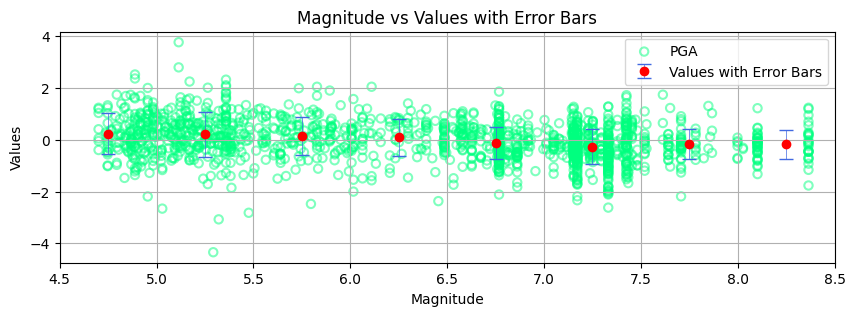

In [ ]:
mean_values_to_plot = []
std_values_to_plot = []
for magnitude_range in [(4, 4.5),(4.5,5),(5,5.5), (5.5, 6), (6, 6.5),(6.5,7),(7,7.5), (7.5, 8),(8,8.5)]:
    subset = ss_residuals_to_plot[(ss_residuals_to_plot['Magnitude'] >= magnitude_range[0]) &
                                (ss_residuals_to_plot['Magnitude'] < magnitude_range[1])]
    mean_values_to_plot.append(subset['PGA'].mean())
    std_values_to_plot.append(subset['PGA'].std())

magnitudes_to_plot = [4.25, 4.75, 5.25, 5.75, 6.25, 6.75,7.25, 7.75,8.25]

# Plot scatter plot with error bars
plt.figure(figsize=(10, 3))
plt.errorbar(magnitudes_to_plot, mean_values_to_plot, yerr=std_values_to_plot, fmt='o', capsize=5, label='Values with Error Bars', color='royalblue', markerfacecolor='red', markeredgecolor='red',linewidth=0.5)
plt.scatter(ss_residuals_to_plot['Magnitude'], ss_residuals_to_plot['PGA'], label='PGA', color='none', edgecolors='springgreen', alpha=0.5, linewidth=1.5)
plt.xlabel('Magnitude')
plt.ylabel('Values')
plt.xlim(4.5, 8.5)  # Set x-axis limits from 4 to 8
plt.title('Magnitude vs Values with Error Bars')
plt.legend()
plt.grid(True)
plt.show()